In [1]:
from sklearn.datasets import load_svmlight_file
X, y = load_svmlight_file(f="housing_scale.txt", n_features=13)
X = X.toarray()

In [2]:
import numpy
n_samples, n_features = X.shape
#print(X.shape)
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2)

In [4]:
penalty_factor = 0.0001
learning_rate = 0.01
max_iteration = 50000
losses_train = []
losses_validate = []

In [5]:
w = numpy.zeros((n_features + 1, ))

In [6]:
import random
from numpy import average, square, asscalar, add
for itr in range(max_iteration):
    r = random.randint(0, X_train.shape[0]-1)
    G = ((X_train[r].dot(w)-y_train[r])*(X_train[r].transpose()) + (penalty_factor*w)) / X_train.shape[0]
    D = -G
    w = w + learning_rate * D
    loss_train = 0.5*average(square(y_train-X_train.dot(w)))+0.5*penalty_factor*average(square(w))
    losses_train.append(loss_train)
    loss_validate = 0.5*average(square(y_validate-X_validate.dot(w)))+0.5*penalty_factor*average(square(w))
    losses_validate.append(loss_validate)
    #print("The loss under the training set is ", loss_train)
    #print("The loss under the validating set is ", loss_validate)

Text(0.5, 1.0, 'The Graph of SGD Loss Value with The Number of Iterations')

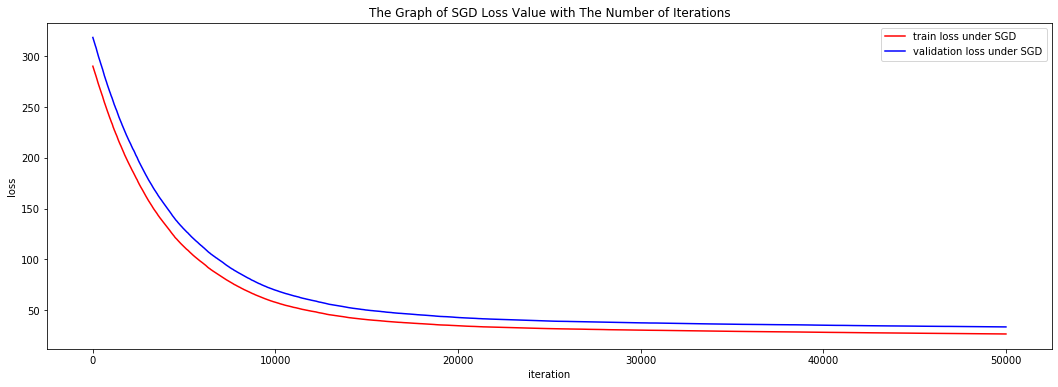

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss under SGD")
plt.plot(losses_validate, "-", color="b", label="validation loss under SGD")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()
plt.title("The Graph of SGD Loss Value with The Number of Iterations")